In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline

In [2]:
crime_df = pd.read_csv("/Users/guozhiqi-seven/Google Drive/NYU Master/Big Data/project/NYPD_Complaint_Data_Historic.csv")

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
crime_df.shape 

(5101231, 24)

In [5]:
crime_df.head() 

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [16]:
#for col in crime_df.columns:
#    print(crime_df[col].isnull().sum())
    
def count_missing_value_by_col(df):
    missing_count = df.isnull().sum()
    missing_value_df = pd.concat([missing_count, missing_count/df.shape[0] * 100], axis=1)
    missing_value_df.columns = ['Count', 'Percent']
    return missing_value_df
missing_count_df = count_missing_value_by_col(crime_df);missing_count_df.T

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
Count,0.0,655.00000,48.000000,1.391478e+06,1.387785e+06,0.0,0.0,18840.000000,4574.000000,4574.000000,...,390.000000,1.127128e+06,33279.000000,5.093632e+06,4.848026e+06,188146.000000,188146.000000,188146.000000,188146.000000,188146.000000
Percent,0.0,0.01284,0.000941,2.727730e+01,2.720490e+01,0.0,0.0,0.369323,0.089665,0.089665,...,0.007645,2.209522e+01,0.652372,9.985104e+01,9.503639e+01,3.688247,3.688247,3.688247,3.688247,3.688247


In [23]:
missing_count_df

,Count,Percent
CMPLNT_NUM,0,0.000000
CMPLNT_FR_DT,655,0.012840
CMPLNT_FR_TM,48,0.000941
CMPLNT_TO_DT,1391478,27.277298
CMPLNT_TO_TM,1387785,27.204904
RPT_DT,0,0.000000
KY_CD,0,0.000000
OFNS_DESC,18840,0.369323
PD_CD,4574,0.089665
PD_DESC,4574,0.089665


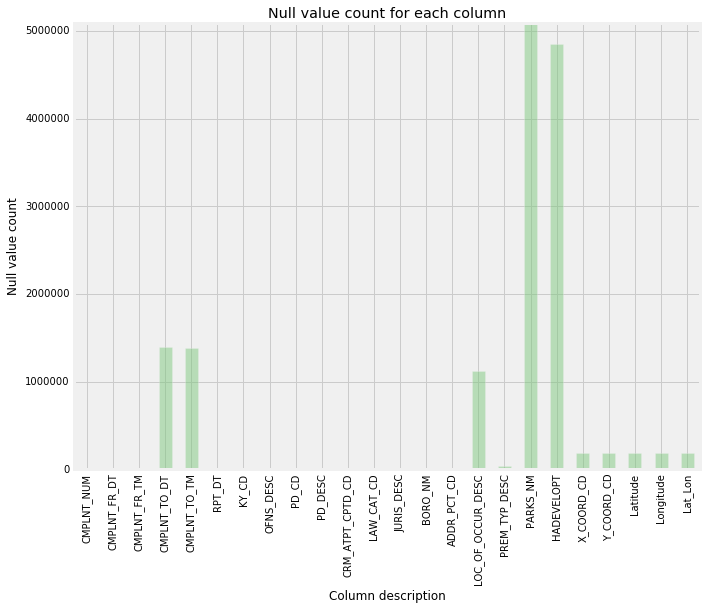

In [131]:
fig = plt.figure(figsize = (10, 8)) 
ax = plt.subplot(111)
cm = plt.cm.get_cmap('Accent')

missing_count_df['Count'].plot(kind='bar',alpha=0.5,colormap=cm,stacked=True)
plt.grid(True)
plt.ylim((0,5093632))
plt.ylabel('Null value count')
plt.xlabel('Column description')
plt.title('Null value count for each column')

fig.savefig('Nullvalue')

In [50]:
CMPLNT_FR_DT_year = [('2014', 490363),('2003', 1535),('1971', 3),('1966', 26),('1948', 1),('1900', 5),('1942', 2),('1961', 1),('2008', 528675),('1915', 7),
 ('2010', 509725),('1996', 120),('1991', 27),('1975', 8),('1941', 2),('1965', 5),('1909', 3),('1998', 216),('1970', 6),('1995', 73),('1969', 6),('1955', 3),('1920', 6),('1979', 9),
 ('1905', 2),('1986', 27),('1908', 3),('1906', 1),('1997', 131),('2005', 10767),('1950', 3),('1976', 3),('1973', 7),('1999', 334),('1940', 1),
 ('2002', 1039),('1913', 9),('1994', 63),('1946', 1),('1993', 42),('2012', 504128),('2015', 468576),('1982', 7),('2001', 986),('1938', 1),
 ('1990', 34), ('1959', 2),('1914', 10),('1960', 8), ('1910', 9),('1980', 13),('1954', 2),('1919', 1),('1962', 3),('1992', 44),('2004', 2095),
 ('1968', 10),('2000', 902),('1911', 7),('2011', 498198),('1978', 5),('1974', 9),('1956', 1),('2006', 539024),('2009', 510946),('1964', 1),
 ('1977', 8),('1983', 3),('2007', 537201),('1958', 1),('1981', 8),('1972', 5),('2013', 494958),('1922', 1),('1945', 2),('1984', 7),('1987', 12),
 ('1912', 9),('1015', 7),('1967', 13),('1985', 18),('1929', 1),('1930', 1),('1988', 16),('1989', 23)]

In [51]:
CMPLNT_FR_DT_year_df = pd.DataFrame(CMPLNT_FR_DT_year, columns=['year', 'count']) 

In [70]:
CMPLNT_FR_DT_year_df.sort_values('count',ascending=False).head(10)

,year,count
63,2006,539024
68,2007,537201
8,2008,528675
64,2009,510946
10,2010,509725
40,2012,504128
59,2011,498198
72,2013,494958
0,2014,490363
41,2015,468576


In [79]:
crime_df['CMPLNT_FR_DT'].ix[0]

'12/31/2015'

In [85]:
CMPLNT_FR_DT_month = [('05', 447946), ('01', 416073),('12', 396451),('09', 437906),('11', 404670),('08', 455531),('06', 440047),
 ('07', 455911),('03', 421703),('04', 415965),('10', 445188),('02', 363185)]
CMPLNT_FR_DT_month_df = pd.DataFrame(CMPLNT_FR_DT_month, columns=['month', 'count']) 
CMPLNT_FR_DT_month_df.sort_values('count',ascending=False).T

,7,5,0,10,6,3,8,1,9,4,2,11
month,07,08,05,10,06,09,03,01,04,11,12,02
count,455911,455531,447946,445188,440047,437906,421703,416073,415965,404670,396451,363185


In [88]:
CMPLNT_FR_DT_date = [('17', 167483),('05', 169483),('16', 165424),('14', 166979),('24', 163435),('20', 173893),('22', 165593),
 ('01', 212054),('26', 160702),('19', 164112),('12', 168548),('09', 166012),('11', 166249),('18', 166818),('28', 164046),
 ('23', 165317),('08', 164996),('06', 165261),('13', 166491),('07', 165986),('03', 165137),('29', 150850),('31', 94513),
 ('30', 150996),('04', 165540),('15', 175027),('27', 163069),('10', 171303),('25', 162778),('02', 165517),('21', 166964)]
CMPLNT_FR_DT_date_df = pd.DataFrame(CMPLNT_FR_DT_date, columns=['date', 'count']) 
CMPLNT_FR_DT_date_df.sort_values('count',ascending=False).T

,7,25,5,27,1,10,0,3,30,13,...,16,9,14,4,26,28,8,23,21,22
date,01,15,20,10,05,12,17,14,21,18,...,08,19,28,24,27,25,26,30,29,31
count,212054,175027,173893,171303,169483,168548,167483,166979,166964,166818,...,164996,164112,164046,163435,163069,162778,160702,150996,150850,94513


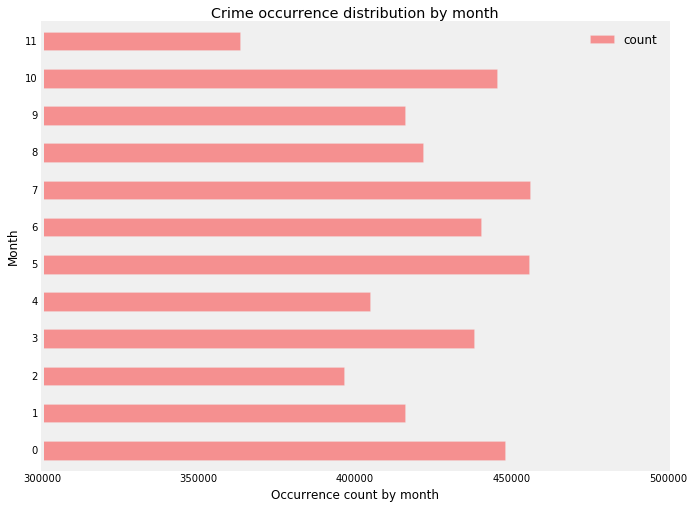

In [136]:
cm = plt.cm.get_cmap('Set3')

CMPLNT_FR_DT_month_df.plot(kind='barh',color='r',alpha=0.4,figsize = (10, 8))
plt.xlim((300000,500000))
plt.grid(False)

plt.ylabel('Month')
plt.xlabel('Occurrence count by month')
plt.title('Crime occurrence distribution by month')
plt.savefig('crimemonth')


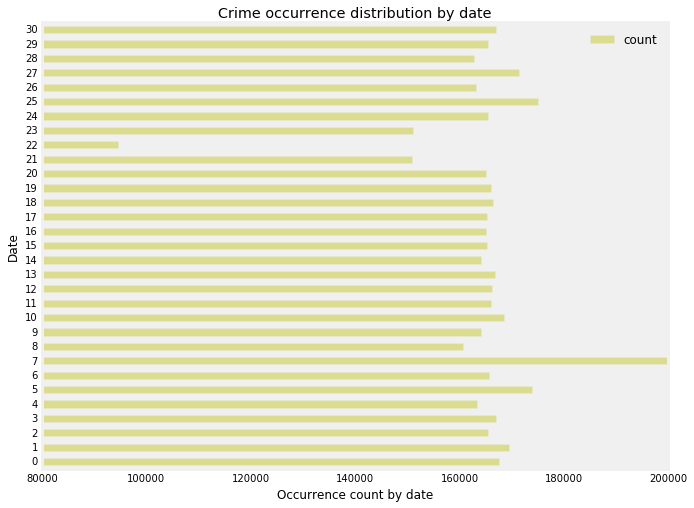

In [135]:
cm = plt.cm.get_cmap('Set3')

CMPLNT_FR_DT_date_df.plot(kind='barh',color='y',alpha=0.4,figsize = (10, 8))
plt.xlim((80000,200000))
plt.grid(False)

plt.ylabel('Date')
plt.xlabel('Occurrence count by date')
plt.title('Crime occurrence distribution by date')
plt.savefig('crimedate')

In [140]:
CMPLNT_FR_TM_hour = [('17', 291049),('05', 72068),('16', 291289),('14', 271976),('20', 290218),('24', 903),('22', 251364),
 ('00', 242359),('01', 176868),('19', 292329),('12', 280052),('09', 188304),('11', 199185),('18', 300438),('23', 233095),('08', 170462),
 ('06', 73137),('13', 239953),('07', 104624),('03', 118617),('04', 103641),('15', 308633),('10', 194347),('02', 141190),('21', 265082)]
CMPLNT_FR_TM_hour_df = pd.DataFrame(CMPLNT_FR_TM_hour, columns=['hour', 'count']) 
CMPLNT_FR_TM_hour_df.sort_values('count',ascending=False).T

,21,13,9,2,0,4,10,3,24,6,...,11,8,15,23,19,18,20,16,1,5
hour,15,18,19,16,17,20,12,14,21,22,...,09,01,08,02,03,07,04,06,05,24
count,308633,300438,292329,291289,291049,290218,280052,271976,265082,251364,...,188304,176868,170462,141190,118617,104624,103641,73137,72068,903


In [145]:
crime_df[['KY_CD','OFNS_DESC']].head(10) 

,KY_CD,OFNS_DESC
0,113,FORGERY
1,101,MURDER & NON-NEGL. MANSLAUGHTER
2,117,DANGEROUS DRUGS
3,344,ASSAULT 3 & RELATED OFFENSES
4,344,ASSAULT 3 & RELATED OFFENSES
5,106,FELONY ASSAULT
6,235,DANGEROUS DRUGS
7,118,DANGEROUS WEAPONS
8,344,ASSAULT 3 & RELATED OFFENSES
9,341,PETIT LARCENY


In [152]:
crime_df['OFNS_DESC'].value_counts()  #70
#len(crime_df['OFNS_DESC'].value_counts())

PETIT LARCENY                           822498
HARRASSMENT 2                           604070
ASSAULT 3 & RELATED OFFENSES            521538
CRIMINAL MISCHIEF & RELATED OF          505774
GRAND LARCENY                           429196
DANGEROUS DRUGS                         348469
OFF. AGNST PUB ORD SENSBLTY &           283065
ROBBERY                                 198772
BURGLARY                                191406
FELONY ASSAULT                          184069
DANGEROUS WEAPONS                       124235
MISCELLANEOUS PENAL LAW                 118721
GRAND LARCENY OF MOTOR VEHICLE          102061
OFFENSES AGAINST PUBLIC ADMINI          100118
INTOXICATED & IMPAIRED DRIVING           73730
CRIMINAL TRESPASS                        66544
VEHICLE AND TRAFFIC LAWS                 59140
THEFT-FRAUD                              56762
SEX CRIMES                               54970
FORGERY                                  49303
FRAUDS                                   32054
POSSESSION OF